In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(512, 512)
[  0. 155. 255.]


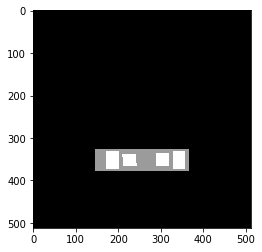

In [15]:
frontView = False

def getImages(labelNumber):
    
    ID = str(labelNumber).zfill(6) + ".npy"
    relPath = "./"
    topShelf = relPath + "top"+ID
    if(frontView):
        frontShelf = relPath + "front"+ID
    
    topShelfFile = np.load(topShelf)
    if(frontView):
        frontShelfFile = np.load(frontShelf)
    
    frontViewLayout = []
    topView = []
    for m in range(4):
        
        ts = topShelfFile[m,:,:]
        if(frontView):
            fs = frontShelfFile[m,:,:]
                    
        if(frontView):
            frontView.append(fs)
            
        topView.append(ts)
    return frontViewLayout, topView

def viz_layouts(frontView, topView):
    plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))

    m = 0
    for row in ax:
        for col in row:
            if(m%2 == 0 and frontView):
                cv2.imwrite("front"+str(int(m/2))+".png", topView[int(m/2)])
                col.imshow(topView[int(m/2)], cmap="gray")
                col.title.set_text('Top View of shelf number : %d'% (int(m/2)+1))
            else:
                cv2.imwrite("top"+str(int(m/2))+".png", frontView[int(m/2)])
                col.imshow(frontView[int(m/2)], cmap="gray")
                col.title.set_text('Front View of shelf number : %d'% (int(m/2)+1))
            col.axis('off')
            m += 1
    plt.show()
            

labelNumberToAnnotate = 11
frontViewLayout, topView = getImages(labelNumberToAnnotate)
#viz_layouts(frontViewLayout, topView)
plt.imshow(topView[0], cmap="gray")
print(topView[0].shape)
print(np.unique(topView[0]))